In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pingouin as pg

In [2]:
df=pd.read_csv("prl.csv")

In [3]:
df.head()

,DATE,CCN_1.0_cm3,PM25,SS_1.0_mg,rain,H14_Hcb
0,2013-06-26,1043.916667,14.877976,0.134444,29.083333,2530.1
1,2013-07-02,1065.000000,12.708333,0.120000,31.750000,2937.5
2,2013-07-07,1210.466667,14.820000,0.200333,106.100000,2957.7
3,2013-07-18,1260.500000,19.250000,0.203333,45.500000,3282.5
4,2013-07-23,1105.750000,31.000000,0.202500,23.750000,6972.0


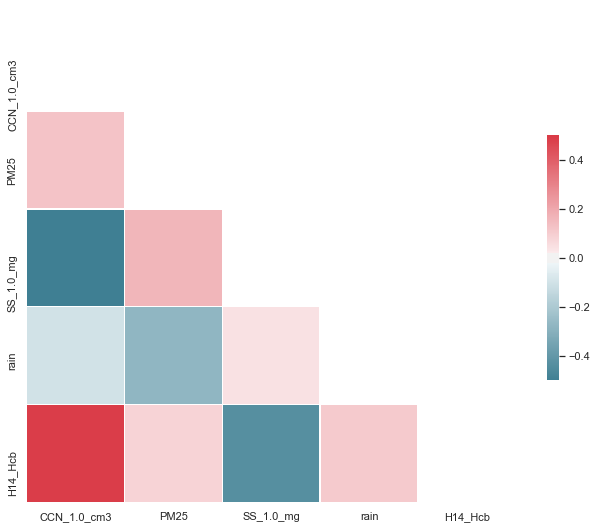

In [4]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-0.5, 0.5),vmax=.5, vmin=-0.5,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
df1=df[df["rain"]>0]

In [6]:
df1.reset_index(drop=True, inplace=True)

In [7]:
df1.set_index('DATE', inplace=True)

In [8]:
profile=pandas_profiling.ProfileReport(df1)
profile.to_file(outputfile = "prl_profilerain.html")

In [9]:
pg.ttest(df1["CCN_1.0_cm3"].values,df1["rain"].values)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,14.277,78,two-sided,1.842202e-23,"[711.31, 941.83]",3.192,1.315e+20,1.0
